In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [177]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [178]:
label = df.groupby("label")
label

In [179]:
label.get_group("rice")

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [180]:
label[["humidity"]].mean()

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [181]:
labels = list(label.mean().index)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [182]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[20.8,
 100.23,
 40.02,
 40.09,
 21.98,
 101.2,
 117.77,
 23.18,
 78.4,
 20.75,
 18.77,
 77.76,
 20.07,
 21.44,
 20.99,
 100.32,
 19.58,
 49.88,
 20.73,
 18.87,
 79.89,
 99.42]

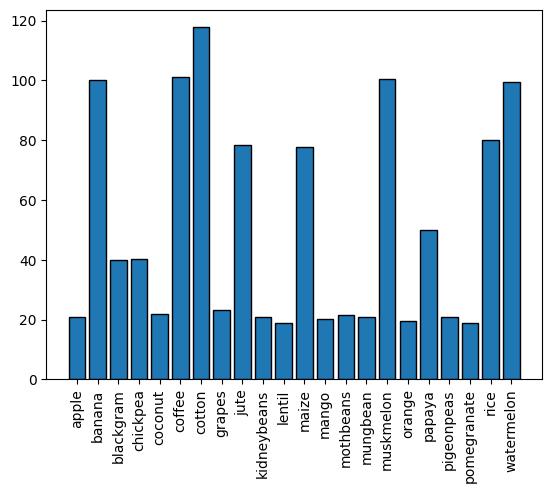

In [183]:
plt.bar(x = labels , height=nitrogen, ec = "k")
plt.xticks(rotation = 90)
plt.show()

In [184]:
x = df.drop("label", axis = 1)

In [185]:
##standardscaler  --- normalise -- outliers se deal karne ke liye 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transformed = sc.fit_transform(x)
x_transformed.shape 

(2200, 7)

In [186]:
desc = pd.DataFrame(x_transformed).describe()
desc.head()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01


In [187]:
# df.describe()

In [188]:
desc_formatted = desc.applymap(lambda x : f"{int(x):d}")
desc_formatted.head()

C:\Users\jaikr\AppData\Local\Temp\ipykernel_14508\3052499131.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x : f"{int(x):d}")


,0,1,2,3,4,5,6
count,2200,2200,2200,2200,2200,2200,2200
mean,0,0,0,0,0,0,0
std,1,1,1,1,1,1,1
min,-1,-1,0,-3,-2,-3,-1
25%,0,0,0,0,0,0,0


In [189]:
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(x_transformed)

KMeans()

In [190]:
label = kmeans.labels_

In [191]:
df["cluster_8"] = label

In [192]:
df["cluster_8"].value_counts()

cluster_8
5    429
4    356
2    312
0    285
3    220
1    200
7    200
6    198
Name: count, dtype: int64

In [193]:
df[df["label"]== "rice"]["cluster_8"].value_counts()

cluster_8
2    100
Name: count, dtype: int64

In [195]:
df[df["cluster_8"] == 5]["label"].value_counts()

label
mungbean      100
blackgram     100
lentil         94
mothbeans      58
papaya         42
mango          13
pigeonpeas     11
orange         11
Name: count, dtype: int64

In [196]:
##met 
from sklearn.metrics import silhouette_score
## Range -- -1 to 1 
silhouette_score(x_transformed, label)

0.32644568406485364

In [197]:
kmeans.inertia_

4842.123582070127

In [198]:
WCSS = {}
for i in range(5,51):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x_transformed)
    WCSS[i] = kmeans.inertia_

In [200]:
WCSS

{5: 6868.0150733901755,
 6: 6078.458568594539,
 7: 5906.037606789063,
 8: 4842.083075442202,
 9: 4472.479144098599,
 10: 4211.171735874796,
 11: 3938.2059129305485,
 12: 3889.841903174235,
 13: 3621.197620524221,
 14: 3428.6489087256928,
 15: 3104.592826370348,
 16: 2934.835651280913,
 17: 2720.905976578688,
 18: 2604.1339910302963,
 19: 2672.2570783556334,
 20: 2588.5558677420336,
 21: 2414.563113101186,
 22: 2231.4138339318365,
 23: 2179.855331082651,
 24: 2121.1775889394985,
 25: 2077.2641728538833,
 26: 1985.1925810599091,
 27: 1906.3530639492856,
 28: 1935.9054755068382,
 29: 1856.2121541441004,
 30: 1831.0374862756744,
 31: 1720.3633847157428,
 32: 1661.4383940826904,
 33: 1620.476433045992,
 34: 1697.8313210878946,
 35: 1561.821182386071,
 36: 1575.6578160558097,
 37: 1508.986386616211,
 38: 1473.9736999544411,
 39: 1500.897577421964,
 40: 1447.7586605915087,
 41: 1411.58279774036,
 42: 1431.4727267368041,
 43: 1368.2685509896676,
 44: 1362.0601283379572,
 45: 1370.245448066416,

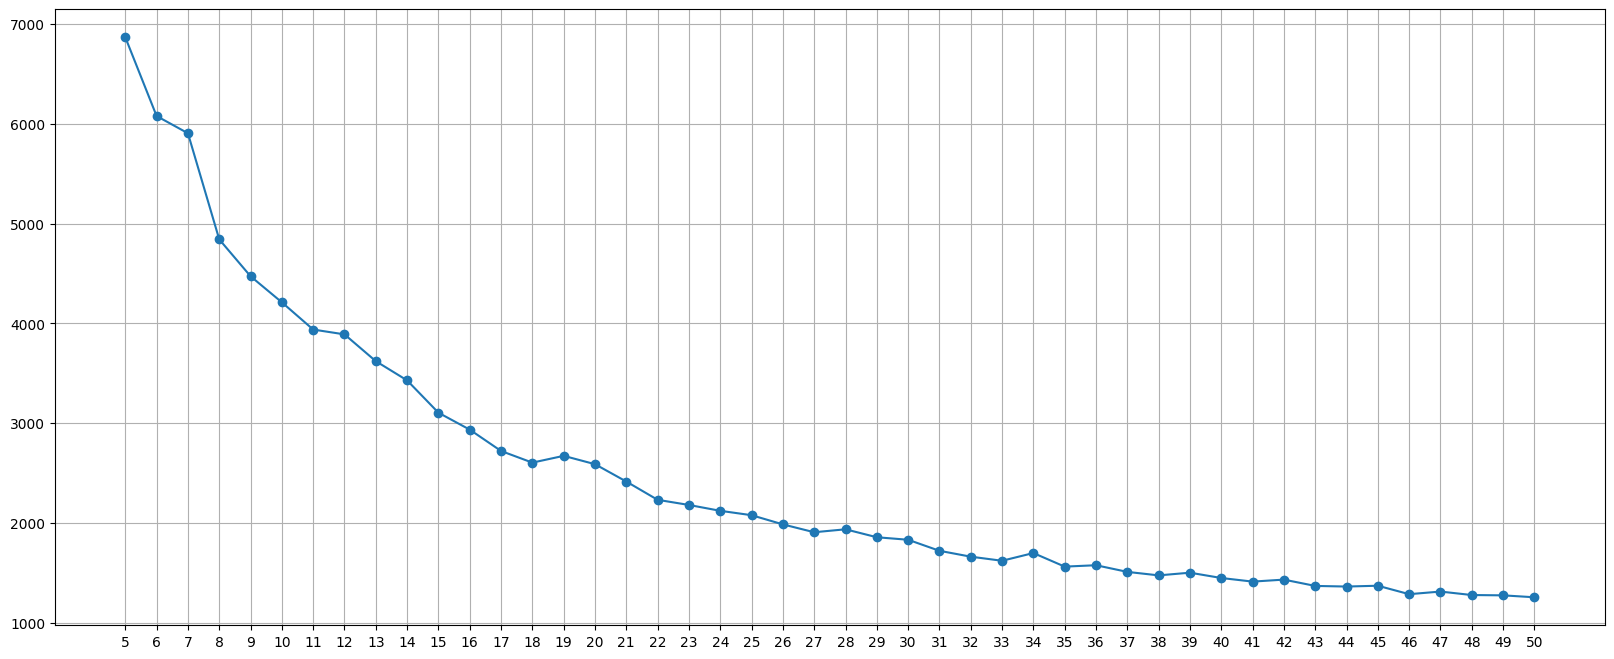

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(WCSS.keys(), WCSS.values(), marker = "o")
#add a line 

plt.xticks(list(WCSS.keys()))
plt.grid(True)
plt.show()


In [202]:
import joblib 

joblib.dump(kmeans, "crop_reco_kmeans.lb")


['crop_reco_kmeans.lb']

In [203]:
joblib.dump(sc,"scaler.lb" )

['scaler.lb']

In [204]:
joblib.dump(df, "crop_reco_df.lb")

['crop_reco_df.lb']